In [1]:
#Se borra todo lo que se encuentra en el entorno

rm(list=ls())

# Librerías ====
if (!require('pacman')) install.packages('pacman')
pacman::p_load(tidyverse, httr,jsonlite, srvyr,showtext)
remotes::install_github("cpyp-ipdp/funcionespgd", force = TRUE)
library(funcionespgd)

Cargando paquete requerido: pacman

Using GitHub PAT from the git credential store.




rlang  (1.1.4 -> 1.1.6) [CRAN]
glue   (1.7.0 -> 1.8.0) [CRAN]
cli    (3.6.3 -> 3.6.5) [CRAN]
tibble (3.2.1 -> 3.3.0) [CRAN]


Installing 4 packages: rlang, glue, cli, tibble

Warning message:
"package 'tibble' is in use and will not be installed"
Installing packages into 'C:/Users/claud/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'rlang' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'rlang'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problema al copiar C:\Users\claud\AppData\Local\R\win-library\4.4\00LOCK\rlang\libs\x64\rlang.dll  a C:\Users\claud\AppData\Local\R\win-library\4.4\rlang\libs\x64\rlang.dll: Permission denied"
Warning message:
"restored 'rlang'"


package 'glue' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'glue'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problema al copiar C:\Users\claud\AppData\Local\R\win-library\4.4\00LOCK\glue\libs\x64\glue.dll  a C:\Users\claud\AppData\Local\R\win-library\4.4\glue\libs\x64\glue.dll: Permission denied"
Warning message:
"restored 'glue'"


package 'cli' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'cli'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problema al copiar C:\Users\claud\AppData\Local\R\win-library\4.4\00LOCK\cli\libs\x64\cli.dll  a C:\Users\claud\AppData\Local\R\win-library\4.4\cli\libs\x64\cli.dll: Permission denied"
Warning message:
"restored 'cli'"



The downloaded binary packages are in
	C:\Users\claud\AppData\Local\Temp\RtmpIZIEoz\downloaded_packages
── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file 'C:\Users\claud\AppData\Local\Temp\RtmpIZIEoz\remotes4547b1767b7\cpyp-ipdp-funcionespgd-3fffa52/DESCRIPTION' ... OK
* preparing 'funcionespgd':
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Omitted 'LazyData' from DESCRIPTION
* building 'funcionespgd_0.1.0.tar.gz'



Installing package into 'C:/Users/claud/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



In [2]:
font_add_google("Poppins", "pop")
showtext_auto()

### Turistas en CDMX

In [3]:
url_tur<-"https://datos.cdmx.gob.mx/dataset/f4bcda9f-803b-4a64-bee1-79fbf02446e3/resource/ce6bc859-5e50-44e4-82b8-990fa97a0dac/download/turistas_desglosado_2024_7.csv"

In [4]:
turistas<-read_csv(url_tur,show_col_types = FALSE)%>%
#Agrupar por año
group_by(anio)%>%
#Sumar turistas
summarise(turistas=sum(turistas))%>%
#Crear índice base 2018=100
mutate(turistas_index=turistas/turistas[anio==2018]*100)%>%
filter(anio<=2019)%>%
#Calcular tasa de crecimiento de turistas index
mutate(tasa_crecimiento=(turistas_index-lag(turistas_index))/lag(turistas_index)*100)%>%na.omit()%>%
rename(year=anio)
turistas

year,turistas,turistas_index,tasa_crecimiento
<dbl>,<dbl>,<dbl>,<dbl>
1999,8893087,63.60288,12.7029977
2000,9123995,65.25432,2.5964887
2001,10451936,74.75168,14.5543811
2002,10170832,72.74124,-2.6894922
2003,10438037,74.65227,2.6271695
2004,11615335,83.07225,11.2789215
2005,12212665,87.34432,5.1425981
2006,11149161,79.73819,-8.7082058
2007,11057203,79.08052,-0.8247975


In [5]:
#Hacer regresión lineal de indice de turistas
modelo<-lm(turistas_index~year,data=turistas)
modelo%>%summary()


Call:
lm(formula = turistas_index ~ year, data = turistas)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.6766  -0.8273   0.3836   1.4069   9.8929 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3183.2457   338.6029  -9.401 1.41e-08 ***
year            1.6263     0.1685   9.649 9.33e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.677 on 19 degrees of freedom
Multiple R-squared:  0.8305,	Adjusted R-squared:  0.8216 
F-statistic: 93.11 on 1 and 19 DF,  p-value: 9.327e-09


`geom_smooth()` using formula = 'y ~ x'


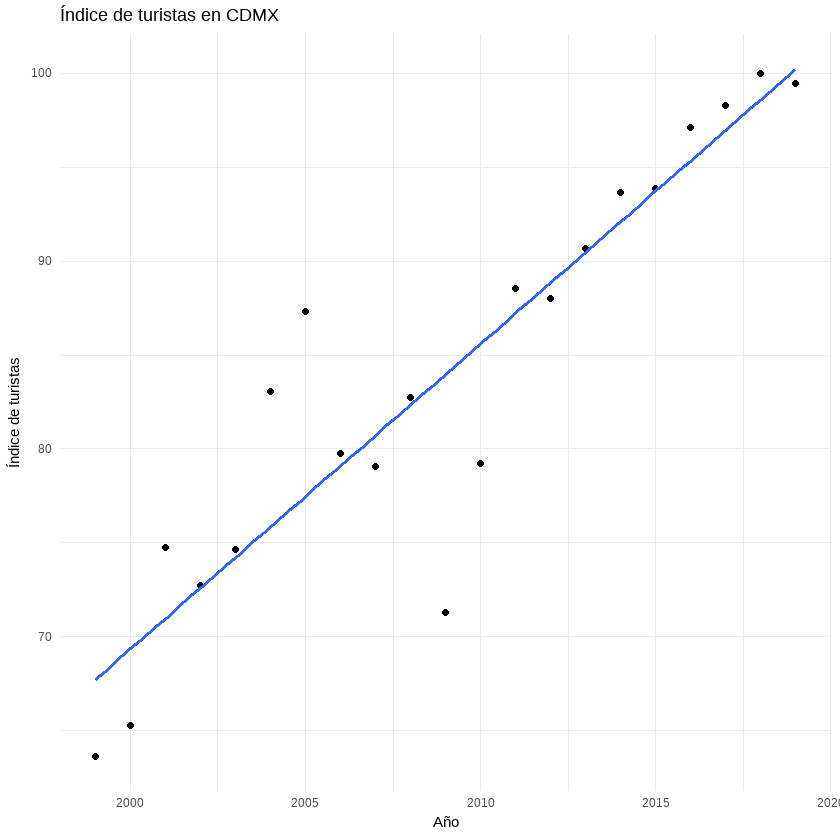

In [6]:
#Graficar
turistas%>%
ggplot(aes(x=year, y=turistas_index))+
geom_point()+
geom_smooth(method="lm",se=FALSE)+
labs(title="Índice de turistas en CDMX",x="Año",y="Índice de turistas")+
theme_minimal()+
theme(legend.position = "none")


In [7]:
#Hacer predicción de índice de turistas para 2025 a 2045
prediccion<-data.frame(year=2020:2045)
prediccion$turistas_index<-predict(modelo,newdata=prediccion)
#Tasa de crecimiento del índice de turistas
prediccion$tasa_crecimiento<-diff(prediccion$turistas_index)/prediccion$turistas_index*100
prediccion

Warning message in diff(prediccion$turistas_index)/prediccion$turistas_index:
"longitud de objeto mayor no es múltiplo de la longitud de uno menor"


year,turistas_index,tasa_crecimiento
<int>,<dbl>,<dbl>
2020,101.8457,1.596811
2021,103.4719,1.571714
2022,105.0982,1.547393
2023,106.7245,1.523814
2024,108.3508,1.500942
2025,109.9771,1.478747
2026,111.6034,1.457199
2027,113.2296,1.436270
2028,114.8559,1.415933


In [8]:
turistas_extended<-bind_rows(turistas,prediccion)%>%
#Calcular turistas
mutate(turistas=turistas_index*turistas[year==2018]/100)
turistas_extended

year,turistas,turistas_index,tasa_crecimiento
<dbl>,<dbl>,<dbl>,<dbl>
1999,8893087,63.60288,12.7029977
2000,9123995,65.25432,2.5964887
2001,10451936,74.75168,14.5543811
2002,10170832,72.74124,-2.6894922
2003,10438037,74.65227,2.6271695
2004,11615335,83.07225,11.2789215
2005,12212665,87.34432,5.1425981
2006,11149161,79.73819,-8.7082058
2007,11057203,79.08052,-0.8247975


Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
"font family 'rob' not found, will use 'sans' instead"
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
"font family 'rob' not found, will use 'sans' instead"
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
"font family 'rob' not found, will use 'sans' instead"
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
"font family 'rob' not found, will use 'sans' instead"
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
"font family 'rob' not found, will use 'sans' instead"
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
"font family 'rob' not found, will use 'sans' instead"
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
"font family 'rob' not found, will use 'sans' instead"
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
"font family 'rob' not found, w

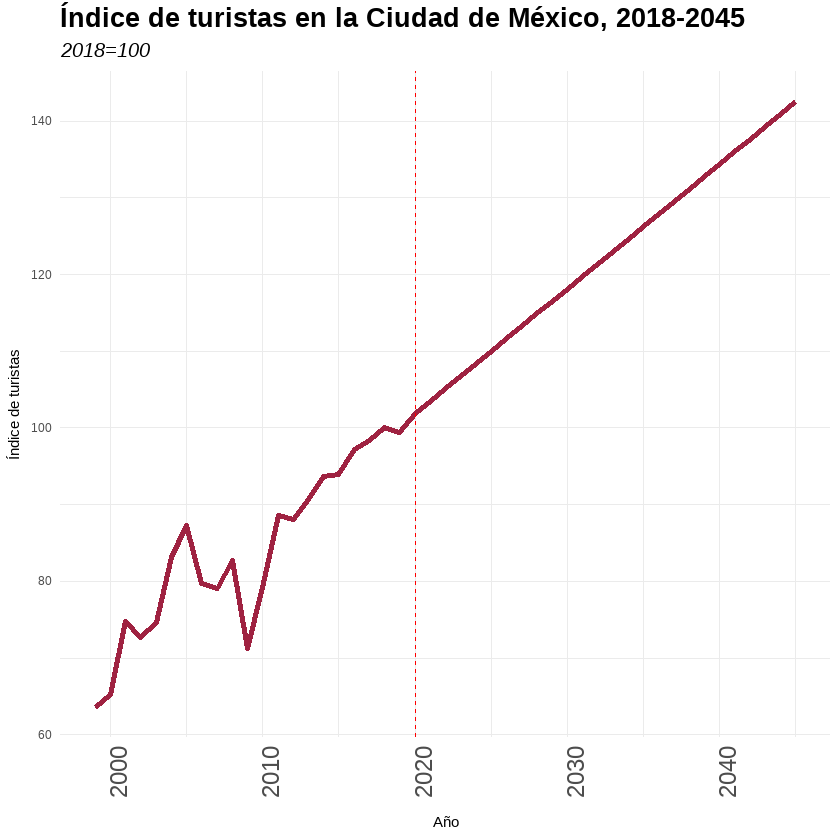

In [9]:
# Plotear índice de turistas
turistas_extended%>%
ggplot(aes(x=year, y=turistas_index))+
geom_line(color="#9f2241",linewidth=1.5)+
geom_vline(xintercept = c(2020), linetype = "dashed", color = "red")+
labs(title="Índice de turistas en la Ciudad de México, 2018-2045",x="Año",y="Índice de turistas",
subtitle="2018=100")+
theme_minimal()+
    theme(
      plot.title = element_text(hjust = 0, size=20, face="bold"),
      plot.subtitle = element_text(hjust = 0, size=15, face="italic"),
      plot.caption = element_text(hjust = 0, size=10),
      legend.position = "None",
      legend.text = element_text(size=18),
      axis.text.x = element_text(angle = 90, hjust = 1, size=18),
      legend.title = element_text(size=18),
      text = element_text(family="rob")
    )

  ggsave("indice_turistas.png", width = 10, height = 6, dpi = 100,bg="white")

In [10]:
## Mostrar valores 2030, 2035 y 2045
turistas_extended%>%
filter(year %in% c(2030,2035,2045))%>%
select(year,turistas_index)


year,turistas_index
<dbl>,<dbl>
2030,118.1085
2035,126.2399
2045,142.5027


### Relación turista internacional por turista nacional

In [11]:
##Calcular turista internacional por cada turista nacional
turnal<-read_csv(url_tur,show_col_types = FALSE)%>%filter(anio<=2019)%>%
group_by(anio,ambito)%>%
summarise(turistas=sum(turistas))%>%
pivot_wider(names_from = "ambito", values_from = "turistas")%>%
janitor::clean_names()%>%
#Calcular turista internacional por cada turista nacional
mutate(turintnal=internacionales/nacionales)%>%
rename(year=anio)

turnal

`summarise()` has grouped output by 'anio'. You can override using the
`.groups` argument.


year,internacionales,nacionales,turintnal
<dbl>,<dbl>,<dbl>,<dbl>
1998,1960885,5929843,0.3306808
1999,1993834,6899253,0.2889927
2000,2098581,7025414,0.2987128
2001,2505806,7946130,0.3153492
2002,2311649,7859183,0.2941335
2003,2595500,7842537,0.3309516
2004,2811310,8804025,0.3193210
2005,3279097,8933568,0.3670535
2006,2822909,8326252,0.3390372


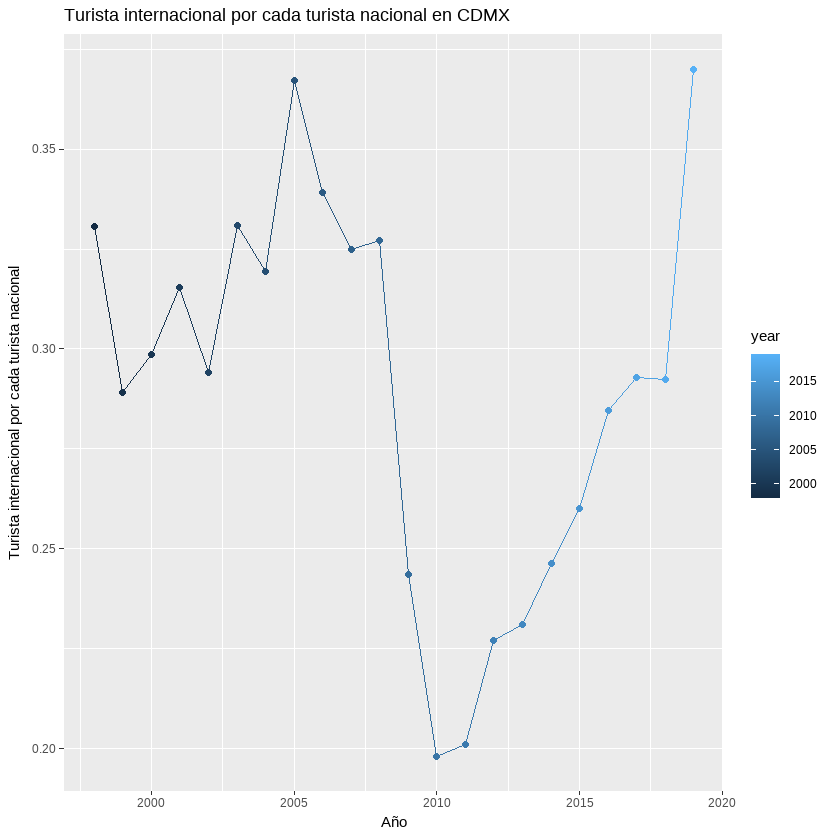

In [12]:
##Graficar turista internacional por cada turista nacional
turnal%>%
ggplot(aes(x=year, y=turintnal, color=year))+
geom_line()+geom_point()+
labs(title="Turista internacional por cada turista nacional en CDMX",x="Año",y="Turista internacional por cada turista nacional")

## Indicador de empleo turístico
La primera aproximación será utilizando el sector Restaurantes y servicios de alojamiento. Esto puede representar una sobreestimación del empleo turístico, ya que los restaurantes son actividades conexas al turismo.

In [13]:
url_trabajo<-"https://www.stps.gob.mx/gobmx/estadisticas/ENOE_TRIM15_2020/df.xls"
#Crear carpeta data
dir.create("data",showWarnings = FALSE)

In [14]:
##Descargar archivo
GET(url_trabajo, write_disk("data/trabajo.xls",overwrite = TRUE), config = config(ssl_verifypeer = FALSE))

Response [https://www.stps.gob.mx/gobmx/estadisticas/ENOE_TRIM15_2020/df.xls]
  Date: 2025-08-20 17:31
  Status: 200
  Content-Type: application/vnd.ms-excel
  Size: 617 kB
<ON DISK>  C:\Users\claud\Documents\GitHub\pgd_cdmx\indicadores\turismo\data\trabajo.xlsNULL

In [15]:
##Leer archivo
trabajo<-readxl::read_xls("data/trabajo.xls",sheet=1, skip=5, col_names = FALSE)%>%
rename(concepto=1)%>%
#Filtrar si concepto contiene Población ocupada o Restaurantes
filter(grepl("Ocupada|Restaurantes",concepto))%>%
#seleccioanr primeros dos renglones
slice(1:2)
trabajo

New names:
• `` -> `...1`
• `` -> `...2`
• `` -> `...3`
• `` -> `...4`
• `` -> `...5`
• `` -> `...6`
• `` -> `...7`
• `` -> `...8`
• `` -> `...9`
• `` -> `...10`
• `` -> `...11`
• `` -> `...12`
• `` -> `...13`
• `` -> `...14`
• `` -> `...15`
• `` -> `...16`
• `` -> `...17`
• `` -> `...18`
• `` -> `...19`
• `` -> `...20`
• `` -> `...21`
• `` -> `...22`
• `` -> `...23`
• `` -> `...24`
• `` -> `...25`
• `` -> `...26`
• `` -> `...27`
• `` -> `...28`
• `` -> `...29`
• `` -> `...30`
• `` -> `...31`
• `` -> `...32`
• `` -> `...33`
• `` -> `...34`
• `` -> `...35`
• `` -> `...36`
• `` -> `...37`
• `` -> `...38`
• `` -> `...39`
• `` -> `...40`
• `` -> `...41`
• `` -> `...42`
• `` -> `...43`
• `` -> `...44`
• `` -> `...45`
• `` -> `...46`
• `` -> `...47`
• `` -> `...48`
• `` -> `...49`
• `` -> `...50`
• `` -> `...51`
• `` -> `...52`
• `` -> `...53`
• `` -> `...54`
• `` -> `...55`
• `` -> `...56`
• `` -> `...57`
• `` -> `...58`
• `` -> `...59`
• `` -> `...60`
• `` -> `...61`
• `` -> `...62`
• `` -

concepto,...2,...3,...4,...5,...6,...7,...8,...9,...10,⋯,...73,...74,...75,...76,...77,...78,...79,...80,...81,...82
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Ocupada,3746052,3790800,3778528,3913841,3879356,3884160,3957838,3936495,3944569,⋯,4698174,4693298,4709095,4712506,4657701,4715069,4834239,4894634,5010045,4892875
Restaurantes y servicios de alojamiento,274592,224626,234805,250709,254018,279602,289481,258040,265813,⋯,381627,343656,352408,379942,381154,350950,411774,415820,439209,427775


In [16]:
# Generar nombre de columnas 2 hacia adelante
start_year <- 2007
start_quarter <- 1

trabajo <- readxl::read_xls("data/trabajo.xls",sheet=1, skip=5, col_names = FALSE)%>%
    rename(concepto = 1) %>%
#Filtrar si concepto contiene Población ocupada o Restaurantes
  filter(grepl("Ocupada|Restaurantes", concepto)) %>%
  slice(1:2) %>%
  #Generar nombre de columnas 2 hacia adelante

  {
    num_quarters <- ncol(.) - 1
    quarter_names <- sapply(0:(num_quarters - 1), function(i) {
      year <- start_year + (start_quarter + i - 1) %/% 4
      quarter <- (start_quarter + i - 1) %% 4 + 1
      paste0(year, " Q", quarter)
    })
    setNames(., c("concepto", quarter_names))
  }%>%
  mutate(across(-concepto, as.numeric))%>%
    pivot_longer(cols = -concepto, names_to = "quarter", values_to = "value")%>%
    #Filtrar si quarter contiene Q4
    filter(grepl("Q4",quarter))%>%
    #Crear año
    mutate(year=as.numeric(str_extract(quarter,"\\d{4}")))%>%
  group_by(year) %>%
  mutate(
    porcentaje_po = value[concepto == "Restaurantes y servicios de alojamiento"] /
      value[concepto == "Ocupada"] * 100
  ) %>%
  ungroup() %>%
  # Select only the desired columns
  select(year, porcentaje_po)


trabajo

New names:
• `` -> `...1`
• `` -> `...2`
• `` -> `...3`
• `` -> `...4`
• `` -> `...5`
• `` -> `...6`
• `` -> `...7`
• `` -> `...8`
• `` -> `...9`
• `` -> `...10`
• `` -> `...11`
• `` -> `...12`
• `` -> `...13`
• `` -> `...14`
• `` -> `...15`
• `` -> `...16`
• `` -> `...17`
• `` -> `...18`
• `` -> `...19`
• `` -> `...20`
• `` -> `...21`
• `` -> `...22`
• `` -> `...23`
• `` -> `...24`
• `` -> `...25`
• `` -> `...26`
• `` -> `...27`
• `` -> `...28`
• `` -> `...29`
• `` -> `...30`
• `` -> `...31`
• `` -> `...32`
• `` -> `...33`
• `` -> `...34`
• `` -> `...35`
• `` -> `...36`
• `` -> `...37`
• `` -> `...38`
• `` -> `...39`
• `` -> `...40`
• `` -> `...41`
• `` -> `...42`
• `` -> `...43`
• `` -> `...44`
• `` -> `...45`
• `` -> `...46`
• `` -> `...47`
• `` -> `...48`
• `` -> `...49`
• `` -> `...50`
• `` -> `...51`
• `` -> `...52`
• `` -> `...53`
• `` -> `...54`
• `` -> `...55`
• `` -> `...56`
• `` -> `...57`
• `` -> `...58`
• `` -> `...59`
• `` -> `...60`
• `` -> `...61`
• `` -> `...62`
• `` -

year,porcentaje_po
<dbl>,<dbl>
2007,6.405702
2008,6.555070
2009,6.555220
2010,7.104769
2011,6.871464
2012,6.731017
2013,6.790198
2014,7.634546
2015,7.727865


`geom_smooth()` using formula = 'y ~ x'
Warning message:
"The following aesthetics were dropped during statistical transformation:
colour.
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?"


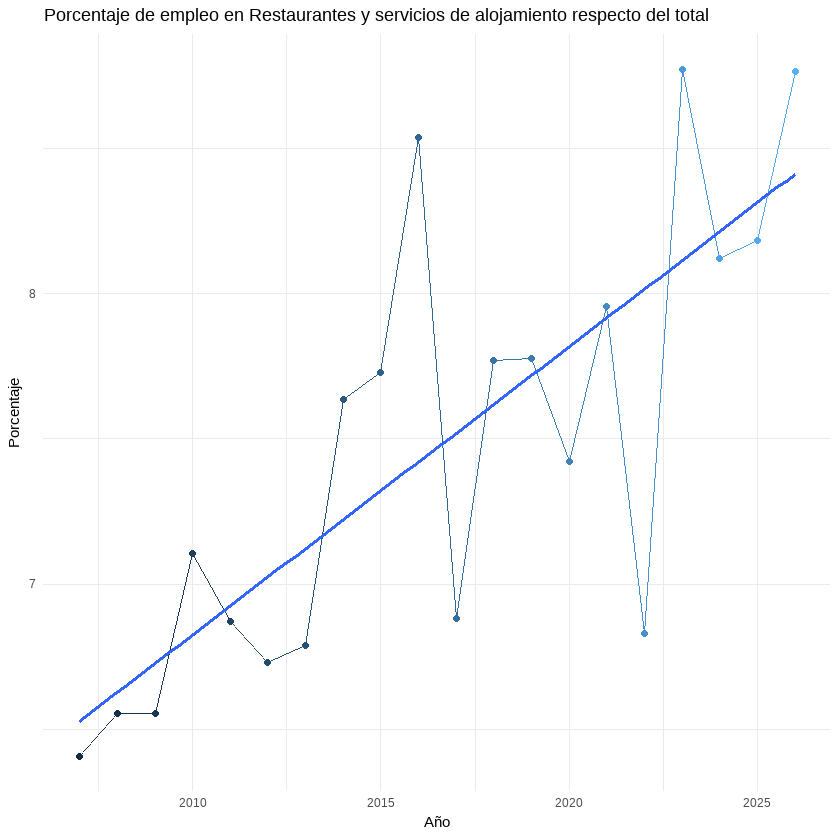

In [17]:
#Graficar
trabajo%>%
ggplot(aes(x=year, y=porcentaje_po, color=year))+
geom_line()+geom_point()+geom_smooth(method="lm",se=FALSE)+
labs(title="Porcentaje de empleo en Restaurantes y servicios de alojamiento respecto del total",x="Año",y="Porcentaje")+theme_minimal()+
theme(legend.position = "none")

In [18]:
#Calcular tasa de crecimiento media anual de empleo en Restaurantes y servicios de alojamiento de 2009 a 2019

valor_inicial<-trabajo%>%filter(year==2009)%>%pull(porcentaje_po)
valor_final<-trabajo%>%filter(year==2019)%>%pull(porcentaje_po)
tasa_crecimiento<-((valor_final/valor_inicial)^(1/(2019-2009))-1)*100
print(paste("La tasa de crecimiento media anual de empleo en Restaurantes y servicios de alojamiento de 2009 a 2019 es de",round(tasa_crecimiento,2),"%"))

[1] "La tasa de crecimiento media anual de empleo en Restaurantes y servicios de alojamiento de 2009 a 2019 es de 1.72 %"
[2] "La tasa de crecimiento media anual de empleo en Restaurantes y servicios de alojamiento de 2009 a 2019 es de 1.72 %"


In [19]:
#Aplicar tasa de crecimiento a 2020 a 2045
trabajo_extended<-data.frame(year=2020:2045)
trabajo_extended$porcentaje_po<-valor_final*(1+tasa_crecimiento/100)^((2020:2045)-2019)
trabajo_extended

year,porcentaje_po
<int>,<dbl>
2020,7.909552
2021,8.045756
2022,8.184305
2023,8.325240
2024,8.468602
2025,8.614433
2026,8.762775
2027,8.913672
2028,9.067166


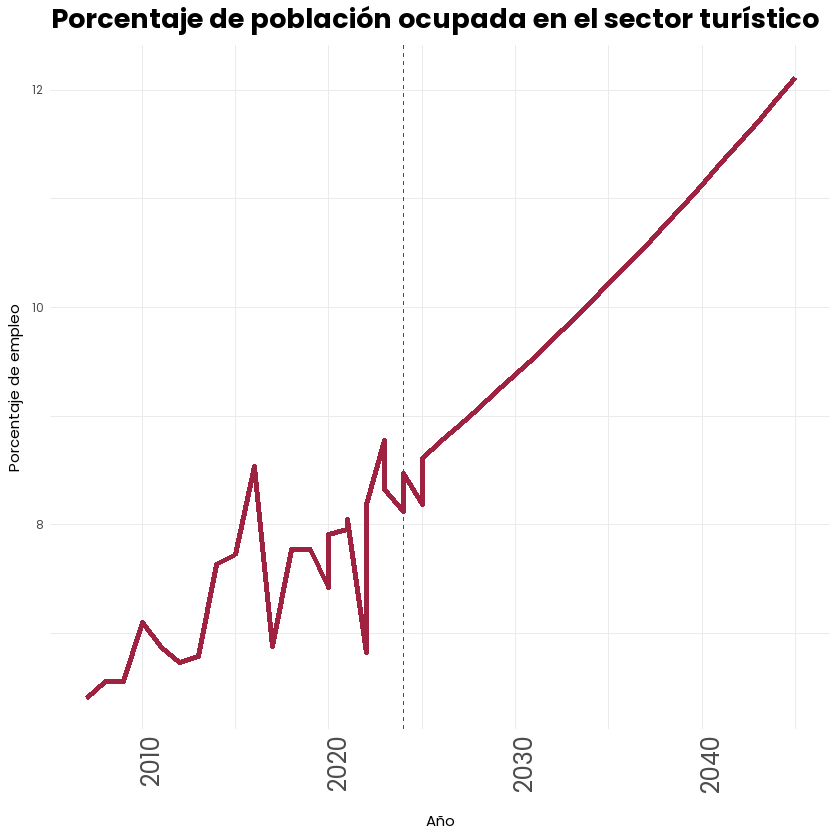

In [20]:
#Pegar datos
trabajos_final<-bind_rows(trabajo,trabajo_extended)
#Graficar
trabajos_final%>%
ggplot(aes(x=year, y=porcentaje_po))+
geom_line(color="#9f2241",linewidth=1.5)+
geom_vline(xintercept = c(2024), linetype = "dashed", color = "red")+
labs(title="Porcentaje de población ocupada en el sector turístico",x="Año",y="Porcentaje de empleo")+theme_minimal()+
theme(legend.position = "none",
        plot.title = element_text(hjust = 0, size=20, face="bold"),
        plot.subtitle = element_text(hjust = 0, size=15, face="italic"),
        plot.caption = element_text(hjust = 0, size=10),
        legend.text = element_text(size=18),
        axis.text.x = element_text(angle = 90, hjust = 1, size=18),
        legend.title = element_text(size=18),
        text = element_text(family="pop")
        )

ggsave("empleo_turistico_1.png", width = 10, height = 6, dpi = 100,bg="white")


In [21]:
#Sacar valores 2030, 2035 y 2045
trabajos_final%>%
filter(year %in% c(2030,2035,2045))%>%
select(year,porcentaje_po)

year,porcentaje_po
<dbl>,<dbl>
2030,9.382131
2035,10.218245
2045,12.120651


La segunda aproximación será considerando microdatos de ENOE y únicamente la actividad de servicios de alojamiento temporal.

In [22]:
# Función para descargar los datos de la ENOE en formato CSV
descargar_enoe_csv <- function() {
  # Crear directorio de trabajo si no existe
  if (!dir.exists("datos")) {
    dir.create("datos")
  }
  if (!dir.exists("datos/enoe")) {
    dir.create("datos/enoe")
  }

  # Cambiar al directorio de trabajo
  setwd("datos/enoe")

  # Función para descargar y extraer archivos
  descargar_extraer <- function(url) {
    temp <- tempfile()
    download.file(url, temp, mode = "wb")
    unzip(temp)
    unlink(temp)
  }

  # Descargar datos de 2005 a 2009
  for (i in 7:9) {
    url <- paste0("https://www.inegi.org.mx/contenidos/programas/enoe/15ymas/microdatos/200", i, "trim3_csv.zip")
    descargar_extraer(url)
  }

  # Descargar datos de 2010 a 2019
  for (i in 10:19) {
    url <- paste0("https://www.inegi.org.mx/contenidos/programas/enoe/15ymas/microdatos/20", i, "trim3_csv.zip")
    print(url)
    descargar_extraer(url)
  }

  # Descargar datos de 2020
  for (i in 20:20) {
    url <- paste0("https://www.inegi.org.mx/contenidos/programas/enoe/15ymas/microdatos/enoe_n_20", i, "_trim3_csv.zip")
    descargar_extraer(url)
  }

  # Descargar datos de 2021 a 2022
  for (i in 21:22) {
    url <- paste0("https://www.inegi.org.mx/contenidos/programas/enoe/15ymas/microdatos/enoe_n_20", i, "_trim3_csv.zip")
    descargar_extraer(url)
  }

  # Descargar datos de 2023
  for (i in 23:23) {
    url <- paste0("https://www.inegi.org.mx/contenidos/programas/enoe/15ymas/microdatos/enoe_20", i, "_trim3_csv.zip")
    descargar_extraer(url)
  }

  # Eliminar archivos innecesarios (conservar solo SDEMT y COE1T)
  # Listar archivos con extensión .csv, sin importar mayúsculas/minúsculas
  archivos <- list.files(pattern = "\\.csv$", ignore.case = TRUE)

  # Lista de archivos a eliminar (que NO contienen "SDEMT" o "COE1T", sin importar mayúsculas/minúsculas)
  archivos_a_eliminar <- archivos[!grepl("sdemt|coe1t", archivos, ignore.case = TRUE)]
  file.remove(archivos_a_eliminar)

  # Eliminar archivo zip (si existe)
  if (file.exists("archivos.zip")) {
    file.remove("archivos.zip")
  }

  # Regresar al directorio original
  setwd("../..")
}

In [23]:
options(timeout = 3000)
descargar_enoe_csv()

[1] "https://www.inegi.org.mx/contenidos/programas/enoe/15ymas/microdatos/2010trim3_csv.zip"
[1] "https://www.inegi.org.mx/contenidos/programas/enoe/15ymas/microdatos/2011trim3_csv.zip"
[1] "https://www.inegi.org.mx/contenidos/programas/enoe/15ymas/microdatos/2012trim3_csv.zip"
[1] "https://www.inegi.org.mx/contenidos/programas/enoe/15ymas/microdatos/2013trim3_csv.zip"
[1] "https://www.inegi.org.mx/contenidos/programas/enoe/15ymas/microdatos/2014trim3_csv.zip"
[1] "https://www.inegi.org.mx/contenidos/programas/enoe/15ymas/microdatos/2015trim3_csv.zip"
[1] "https://www.inegi.org.mx/contenidos/programas/enoe/15ymas/microdatos/2016trim3_csv.zip"
[1] "https://www.inegi.org.mx/contenidos/programas/enoe/15ymas/microdatos/2017trim3_csv.zip"
[1] "https://www.inegi.org.mx/contenidos/programas/enoe/15ymas/microdatos/2018trim3_csv.zip"
[1] "https://www.inegi.org.mx/contenidos/programas/enoe/15ymas/microdatos/2019trim3_csv.zip"


In [24]:
# Función para extraer el año desde el nombre del archivo
extraer_anio <- function(path) {
  anio_str <- str_extract(path, "\\d{2}(?=\\D*$)") # Extrae los últimos dos dígitos del año
  anio <- as.numeric(paste0("20", anio_str)) # Convierte a formato 20XX
  return(anio)
}

In [25]:
# Función para procesar la ENOE con ajuste para `tipo`
estima_empleo_turismo <- function(sdemt_path, coe1t_path, tipo_empleo = "empleo_cultural_federal") {
  year <- extraer_anio(sdemt_path)

  # Leer y filtrar ocupados
  ocupados <- read_csv(sdemt_path, show_col_types = FALSE) %>%
    janitor::clean_names() %>%
    filter(
      clase2 == 1,
      (eda >= 15 & eda <= 98 & !is.na(eda)) & (c_res == 1 | c_res == 3)
    ) %>%
    mutate(year = year) # Agregar el año

  # Leer COE1T y seleccionar columnas según el año
  scian <- read_csv(coe1t_path, show_col_types = FALSE) %>%
    janitor::clean_names() %>%
    { if (year <= 2019) select(., cd_a, ent, con, v_sel, n_hog, h_mud, n_ren, p4a) else
        select(., tipo, mes_cal, cd_a, ent, con, v_sel, n_hog, h_mud, n_ren, p4a) } %>%
    rename(scian_4 = p4a)



  # Hacer el `left_join()` sin `tipo` si el año está entre 2005 y 2019
  if (year <= 2019) {
    ocupados <- left_join(ocupados, scian, by = c("cd_a", "ent", "con", "v_sel", "n_hog", "h_mud", "n_ren"))
  } else {
    ocupados <- left_join(ocupados, scian, by = c("tipo", "mes_cal", "cd_a", "ent", "con", "v_sel", "n_hog", "h_mud", "n_ren"))
  }

  # Clasificación de empleo cultural
  ocupados <- ocupados %>%
    mutate(turismo=case_when(scian_4 %in% c(7210) ~ 1,
            TRUE ~ 0))

  # Crear diseño de encuesta
  options(survey.lonely.psu = "certainty")
  if (year <= 2019) {
    dm <- ocupados %>%
      as_survey_design(
        ids = upm,
        strata = est_d,
        weights = fac,
        nest = TRUE
      )
  } else {
    dm <- ocupados %>%
      as_survey_design(
        ids = upm,
        strata = est_d_tri,
        weights = fac_tri,
        nest = TRUE
      )
  }
  # Filtrar y calcular ocupados por tipo de empleo
  resultado <- if (tipo_empleo == "turismo") {
    dm %>%
      filter(ent == 9) %>%
      group_by(turismo) %>%
      summarise(
        ocupados = survey_total(vartype = "cv"),
        porcentaje = survey_prop(vartype = "cv")
      ) %>%
      mutate(porcentaje = porcentaje * 100) %>%
      filter(turismo == 1)%>%
                mutate(year = year)
  }

            else {
    stop("El parámetro 'tipo_empleo' debe ser 'turismo'")
  }

  return(resultado)
}

In [26]:
lista_archivos <- list.files(path = "datos/enoe", full.names = TRUE)
archivos_sdemt <- lista_archivos[str_detect(lista_archivos, regex("sdemt", ignore_case = TRUE))]
archivos_coe1t <- lista_archivos[str_detect(lista_archivos, regex("coe1t", ignore_case = TRUE))]


In [27]:
# Crear un data frame con los nombres de archivos y sus años
df_archivos <- tibble(
  sdemt = archivos_sdemt,
  year = map_int(archivos_sdemt, extraer_anio)
) %>%
  left_join(
    tibble(
      coe1t = archivos_coe1t,
      year = map_int(archivos_coe1t, extraer_anio)
    ),
    by = "year"
  ) %>%
  filter(!is.na(sdemt) & !is.na(coe1t))%>%
        arrange(year)
df_archivos

sdemt,year,coe1t
<chr>,<int>,<chr>
datos/enoe/SDEMT307.csv,2007,datos/enoe/COE1T307.csv
datos/enoe/SDEMT308.csv,2008,datos/enoe/COE1T308.csv
datos/enoe/SDEMT309.csv,2009,datos/enoe/COE1T309.csv
datos/enoe/SDEMT310.csv,2010,datos/enoe/COE1T310.csv
datos/enoe/SDEMT311.csv,2011,datos/enoe/COE1T311.csv
datos/enoe/sdemt312.csv,2012,datos/enoe/coe1t312.csv
datos/enoe/sdemt313.csv,2013,datos/enoe/coe1t313.csv
datos/enoe/SDEMT314.csv,2014,datos/enoe/COE1T314.csv
datos/enoe/SDEMT315.csv,2015,datos/enoe/COE1T315.csv


In [28]:
print("Población ocupada en turismo en la Ciudad de México respecto del total")
empleo_turismo_cdmx <- df_archivos %>%
        select(-year) %>%
  mutate(data = map2(sdemt, coe1t, ~ estima_empleo_turismo(.x, .y, "turismo"))) %>%
  unnest(data)%>%
        select(year,ocupados,ocupados_cv,porcentaje,porcentaje_cv)%>%
        mutate(porcentaje=round(porcentaje,2))
empleo_turismo_cdmx

[1] "Población ocupada en turismo en la Ciudad de México respecto del total"


Warning message:
"There were 21 warnings in `mutate()`.
The first warning was:
ℹ In argument: `data = map2(sdemt, coe1t, ~estima_empleo_turismo(.x, .y,
  "turismo"))`.
Caused by warning:
! One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)
ℹ Run `dplyr::last_dplyr_warnings()` to see the 20 remaining warnings."


year,ocupados,ocupados_cv,porcentaje,porcentaje_cv
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2007,21498,0.2417355,0.55,0.2420155
2008,16533,0.2466487,0.42,0.2474475
2009,17372,0.2670146,0.44,0.2664210
2010,10617,0.2907634,0.27,0.2916917
2011,19063,0.2335202,0.47,0.2341760
2012,17558,0.2443583,0.42,0.2438694
2013,14213,0.2780863,0.34,0.2768918
2014,17072,0.2941403,0.41,0.2936938
2015,15179,0.3116599,0.34,0.3108393


In [29]:
#Regresión lineal
modelo<-lm(porcentaje~year,data=empleo_turismo_cdmx%>%filter(year>=2009))
modelo%>%summary()


Call:
lm(formula = porcentaje ~ year, data = empleo_turismo_cdmx %>% 
    filter(year >= 2009))

Residuals:
      Min        1Q    Median        3Q       Max 
-0.109857 -0.046714 -0.003286  0.039036  0.120000 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept) -16.418000   8.064315  -2.036   0.0627 .
year          0.008357   0.004000   2.089   0.0569 .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.06694 on 13 degrees of freedom
Multiple R-squared:  0.2514,	Adjusted R-squared:  0.1938 
F-statistic: 4.365 on 1 and 13 DF,  p-value: 0.05692


In [30]:
#Predecir porcentaje de empleo en turismo para 2024 a 2045
prediccion_emp<-data.frame(year=2024:2045)
prediccion_emp$porcentaje<-predict(modelo,newdata=prediccion_emp)
prediccion_emp

year,porcentaje
<int>,<dbl>
2024,0.4968571
2025,0.5052143
2026,0.5135714
2027,0.5219286
2028,0.5302857
2029,0.5386429
2030,0.5470000
2031,0.5553571
2032,0.5637143


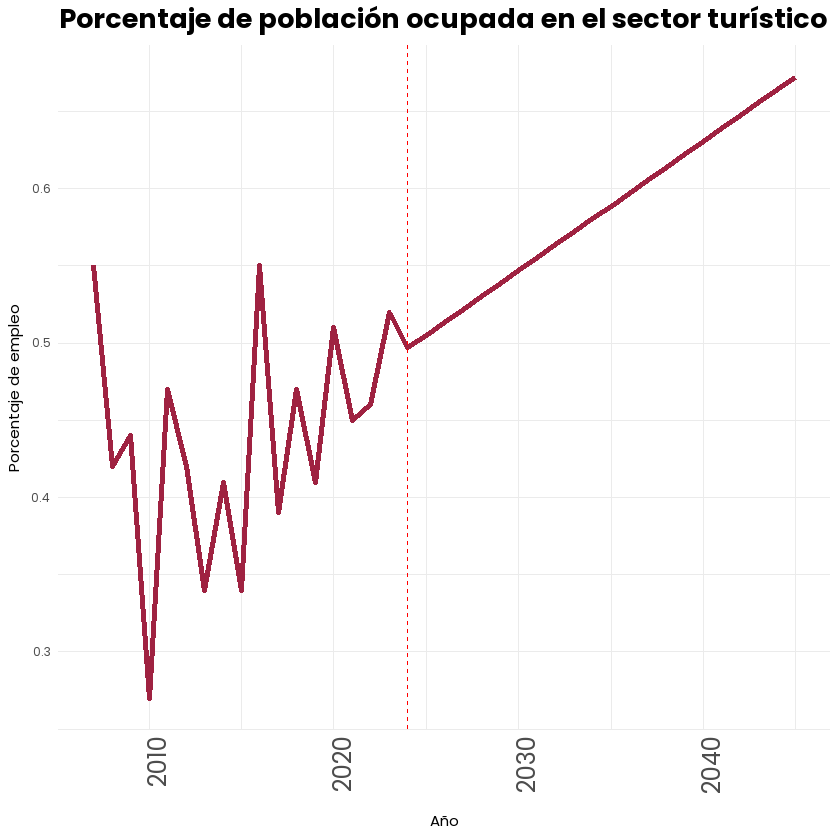

In [31]:
#Pegar datos
empleo_turismo_cdmx_final<-bind_rows(empleo_turismo_cdmx,prediccion_emp)
#Graficar
empleo_turismo_cdmx_final%>%
ggplot(aes(x=year, y=porcentaje))+
geom_line()+
geom_line(color="#9f2241",linewidth=1.5)+
geom_vline(xintercept = c(2024), linetype = "dashed", color = "red")+
labs(title="Porcentaje de población ocupada en el sector turístico",x="Año",y="Porcentaje de empleo")+theme_minimal()+
theme(legend.position = "none",
        plot.title = element_text(hjust = 0, size=20, face="bold"),
        plot.subtitle = element_text(hjust = 0, size=15, face="italic"),
        plot.caption = element_text(hjust = 0, size=10),
        legend.text = element_text(size=18),
        axis.text.x = element_text(angle = 90, hjust = 1, size=18),
        legend.title = element_text(size=18),
        text = element_text(family="pop")
        )

ggsave("empleo_turismo_2.png", width = 10, height = 6, dpi = 100,bg="white")


In [32]:
#Calcular tcma de 2014 a 2023
#tcma<-((empleo_turismo_cdmx$porcentaje[empleo_turismo_cdmx$year==2023]/empleo_turismo_cdmx$porcentaje[empleo_turismo_cdmx$year==2014])^(1/(2023-2014))-1)
#tcma

In [33]:
#Aplicar tcma a 2024 a 2045
#empleo_turismo_cdmx_extended<-data.frame(year=2024:2045)
#empleo_turismo_cdmx_extended$porcentaje <- empleo_turismo_cdmx$porcentaje[empleo_turismo_cdmx$year == 2023] *
#                                           cumprod(rep(1 + tcma, length(2024:2045)))
#empleo_turismo_cdmx_extended

In [34]:
#Pegar datos
#empleo_turismo_cdmx_final<-bind_rows(empleo_turismo_cdmx,empleo_turismo_cdmx_extended)
#Graficar
#empleo_turismo_cdmx_final%>%
#ggplot(aes(x=year, y=porcentaje, color=year))+
#geom_line()+geom_point()+
#labs(title="Porcentaje de empleo en servicios de alojamiento temporal",x="Año",y="Porcentaje de empleo")+theme_minimal()+
#theme(legend.position = "none")

### Valor agregado censal bruto


In [35]:
years<-c("2004","2009","2014","2019")
url_basica<-"https://www.inegi.org.mx/contenidos/programas/ce/2019/"
segunda_parte<-"Datosabiertos/ce"
fin<-"_cdmx_csv.zip"

In [36]:
# Función para descargar y descomprimir
download_unzip <- function(url, path) {

  r <- httr::GET(url, httr::write_disk(path, overwrite = TRUE))


  unzip(path, exdir = dirname(path))
}

In [37]:
# Loop
for (year in years) {
  # Construir url
  url <- paste0(url_basica, segunda_parte, year, fin)
  print(url)

  # Crear carpeta para guardar los datos
  dir.create(paste0("data/", year), showWarnings = FALSE, recursive = TRUE)

  # Descargar y descomprimir
  download_unzip(url, paste0("data/", year, ".zip"))
}

[1] "https://www.inegi.org.mx/contenidos/programas/ce/2019/Datosabiertos/ce2004_cdmx_csv.zip"
[1] "https://www.inegi.org.mx/contenidos/programas/ce/2019/Datosabiertos/ce2009_cdmx_csv.zip"
[1] "https://www.inegi.org.mx/contenidos/programas/ce/2019/Datosabiertos/ce2014_cdmx_csv.zip"
[1] "https://www.inegi.org.mx/contenidos/programas/ce/2019/Datosabiertos/ce2019_cdmx_csv.zip"


In [38]:
file_names <- list.files(path ="data/conjunto_de_datos", pattern = "^ce[0-9]{4}_cdmx\\.csv$", full.names = TRUE)


dataframes <- map(file_names, ~ {
  df <- read.csv(.x, stringsAsFactors = FALSE, header = FALSE)
  colnames(df) <- df[1, ]  # Asignar nombres de columna
  df <- df[-1, ]  #Remover primera fila

  # Extraer el año del nombre del archivo para agregarlo como columna
  year <- gsub("^.*ce([0-9]{4})_cdmx\\.csv$", "\\1", .x)
  df$year <- year

  return(df)
})

# Combinar dataframes y limpiar
censos <- bind_rows(dataframes)%>%
janitor::clean_names()%>%
mutate(municipio = trimws(municipio),
         codigo = trimws(codigo),
         id_estrato = trimws(id_estrato))%>%
 filter(municipio=="")%>%
 filter(id_estrato=="")%>%
 filter(codigo=="" | codigo=="721")%>%
 select(year,codigo,a131a)%>%
 rename(va=a131a)%>%
 mutate(codigo=case_when(codigo=="" ~ "total",
                         codigo=="721" ~ "hospedaje"),
                         va=as.numeric(va))%>%
    pivot_wider(names_from = "codigo", values_from = "va")%>%
    mutate(porcentaje=100*hospedaje/total,
    year=as.numeric(year))


censos

year,total,hospedaje,porcentaje
<dbl>,<dbl>,<dbl>,<dbl>
2004,958820.5,2966.965,0.3094391
2009,1332929.0,2735.351,0.2052136
2014,1535020.7,3991.001,0.2599966
2019,2292636.5,12353.472,0.5388326


In [39]:
#Calcular tasa de crecimiento media anual de 2009 a 2019
tcma<-((censos$porcentaje[censos$year==2019]/censos$porcentaje[censos$year==2004])^(1/(2019-2004))-1)
tcma

[1] 0.03766838

In [40]:

censos_extended<-data.frame(year=2020:2045)
censos_extended$porcentaje <- censos$porcentaje[censos$year == 2019] *
                                           cumprod(rep(1 + tcma, length(2020:2045)))
censos_extended

year,porcentaje
<int>,<dbl>
2020,0.5591295
2021,0.5801910
2022,0.6020459
2023,0.6247240
2024,0.6482563
2025,0.6726751
2026,0.6980136
2027,0.7243067
2028,0.7515901


In [41]:
#Pegar datos
censos_final<-bind_rows(censos,censos_extended)%>%
#Filtrar 2004, 2009, 2014, 2030, 2035 y 2045
filter(year %in% c(2004,2009,2014,2030,2035,2045))%>%
select(year,porcentaje)
censos_final

year,porcentaje
<dbl>,<dbl>
2004,0.3094391
2009,0.2052136
2014,0.2599966
2030,0.8092789
2035,0.9736237
2045,1.4092140


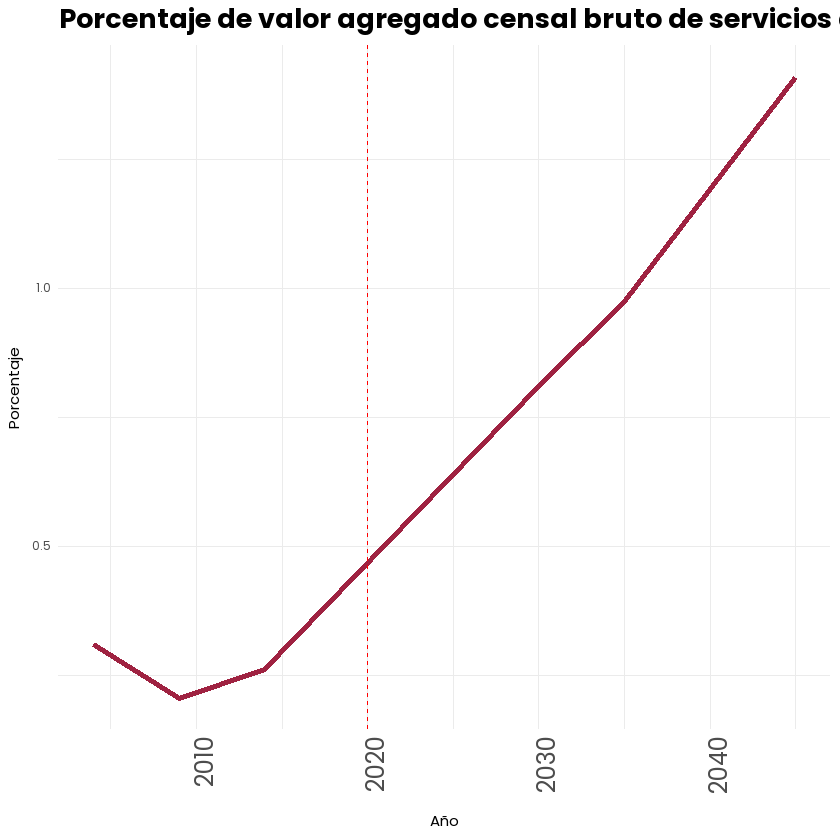

In [42]:
#Graficar
censos_final%>%
ggplot(aes(x=year, y=porcentaje))+
geom_line(color="#9f2241",linewidth=1.5)+
geom_vline(xintercept = c(2020), linetype = "dashed", color = "red")+
labs(title="Porcentaje de valor agregado censal bruto de servicios de hospedaje respecto del total",x="Año",y="Porcentaje")+theme_minimal()+
theme(legend.position = "none",
        plot.title = element_text(hjust = 0, size=20, face="bold"),
        plot.subtitle = element_text(hjust = 0, size=15, face="italic"),
        plot.caption = element_text(hjust = 0, size=10),
        legend.text = element_text(size=18),
        axis.text.x = element_text(angle = 90, hjust = 1, size=18),
        legend.title = element_text(size=18),
        text = element_text(family="pop")
        )

ggsave("valor_agregado.png", width = 12, height = 6, dpi = 100,bg="white")

In [43]:
url_gasto<-"https://datos.cdmx.gob.mx/dataset/d99e5cd1-641e-4e53-9fb1-ef2ac039d48e/resource/315ed64e-5344-4cf9-b586-e50beda97cec/download/gasto_turismo_desglosado_2024_7.csv"

In [44]:
gasto<-read_csv(url_gasto,show_col_types = FALSE)%>%
janitor::clean_names()%>%
group_by(anio)%>%
summarise(gasto=sum(gasto))%>%filter(anio<=2023)%>%
rename(year=anio)

gasto

year,gasto
<dbl>,<dbl>
1998,22881.47
1999,25528.05
2000,27520.43
2001,34374.73
2002,35416.61
2003,40296.27
2004,47623.53
2005,49736.81
2006,45936.08


In [45]:
tur<-read_csv(url_tur,show_col_types = FALSE)%>%
#Agrupar por año
group_by(anio)%>%
#Sumar turistas
summarise(turistas=sum(turistas))%>%filter(anio<=2023)%>%
rename(year=anio)


#Pegar datos
gasto_prom<-gasto%>%
left_join(tur,by="year")%>%mutate(gasto_turista=(gasto*1000000)/turistas)

gasto_prom

year,gasto,turistas,gasto_turista
<dbl>,<dbl>,<dbl>,<dbl>
1998,22881.47,7890728,2899.792
1999,25528.05,8893087,2870.549
2000,27520.43,9123995,3016.270
2001,34374.73,10451936,3288.839
2002,35416.61,10170832,3482.174
2003,40296.27,10438037,3860.522
2004,47623.53,11615335,4100.056
2005,49736.81,12212665,4072.560
2006,45936.08,11149161,4120.137


In [46]:
#Regresión lineal

modelo_gasto<-lm(gasto_turista~year,data=gasto_prom)
modelo_gasto%>%summary()


Call:
lm(formula = gasto_turista ~ year, data = gasto_prom)

Residuals:
     Min       1Q   Median       3Q      Max 
-1263.93  -414.29    65.98   458.46  1311.54 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -502620.90   38905.30  -12.92 2.67e-12 ***
year            252.63      19.35   13.05 2.14e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 740 on 24 degrees of freedom
Multiple R-squared:  0.8766,	Adjusted R-squared:  0.8714 
F-statistic: 170.4 on 1 and 24 DF,  p-value: 2.142e-12


In [47]:
#Hacer predicción de gasto turístico para 2024 a 2045
prediccion_gasto<-data.frame(year=2024:2045)
prediccion_gasto$gasto_turista<-predict(modelo_gasto,newdata=prediccion_gasto)
prediccion_gasto

year,gasto_turista
<int>,<dbl>
2024,8704.036
2025,8956.667
2026,9209.297
2027,9461.928
2028,9714.559
2029,9967.190
2030,10219.821
2031,10472.452
2032,10725.083


Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
"font family ''pop'' not found, will use 'sans' instead"
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
"font family ''pop'' not found, will use 'sans' instead"
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
"font family ''pop'' not found, will use 'sans' instead"
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
"font family ''pop'' not found, will use 'sans' instead"
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
"font family ''pop'' not found, will use 'sans' instead"
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
"font family ''pop'' not found, will use 'sans' instead"
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
"font family ''pop'' not found, will use 'sans' instead"
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
"font family ''po

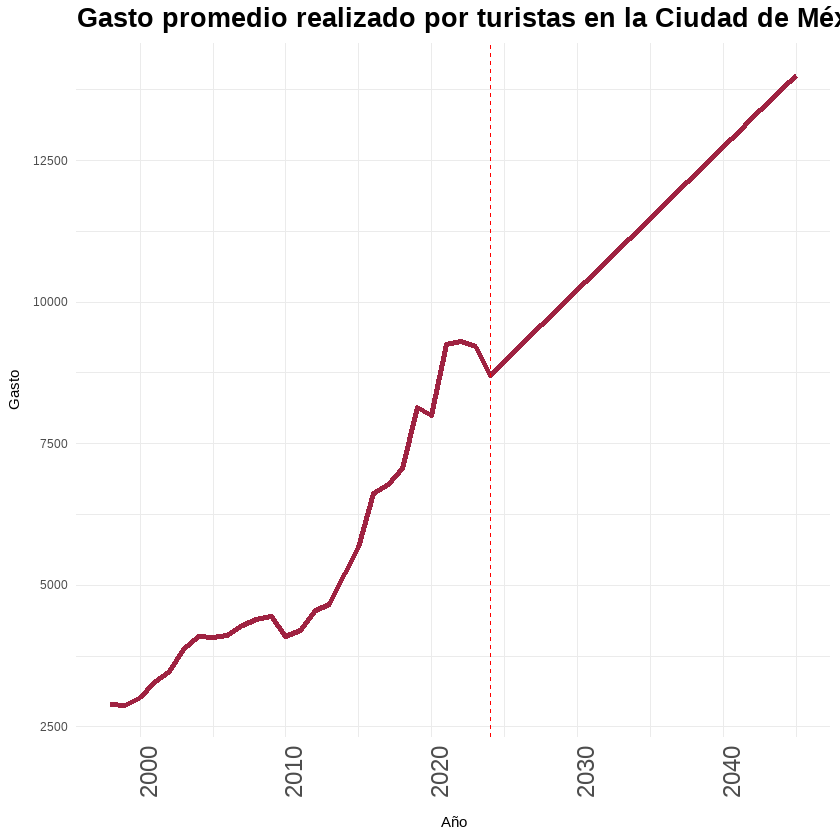

In [48]:
#Pegar datos
gasto_final<-bind_rows(gasto_prom,prediccion_gasto)
#Graficar
gasto_final%>%
ggplot(aes(x=year, y=gasto_turista))+
geom_line(color="#9f2241",linewidth=1.5)+
geom_vline(xintercept = c(2024), linetype = "dashed", color = "red")+
labs(title="Gasto promedio realizado por turistas en la Ciudad de México",x="Año",y="Gasto")+
theme_minimal()+
    theme(
      plot.title = element_text(hjust = 0, size=20, face="bold"),
      plot.subtitle = element_text(hjust = 0, size=15, face="italic"),
      plot.caption = element_text(hjust = 0, size=10),
      legend.position = "None",
      legend.text = element_text(size=18),
      axis.text.x = element_text(angle = 90, hjust = 1, size=18),
      legend.title = element_text(size=18),
      text = element_text(family="'pop'")
    )
ggsave("gasto_turistico.png", width = 10, height = 6, dpi = 100,bg="white")


### Escenarios

In [49]:
generar_grafica <- function(tabla_obs, tabla_est, margen, titulo,base, linea_base,
                            nombre_archivo, nombre_estimado_futuro,despegue,
                            nombre_intervalo_superior, nombre_intervalo_inferior,
                            limite_inferior_y, variable_intervals, titulo_y) {

  serie_completa <- dplyr::bind_rows(
    tabla_obs %>%
      dplyr::mutate(year = as.numeric(year)) %>%
      intervals(variable_intervals, margen = 0, año_base = base),

    tabla_est %>%
      dplyr::mutate(year = as.numeric(year)) %>%
      intervals(variable_intervals, margen = margen, año_base = base)
  )

  grafica <- grafica_bonita(
    data = serie_completa,
    x = "year",
    y = "estimado",
    titulo = titulo,
    ano_base=base,
     mostrar_etiqueta_ano_base = TRUE,
    linea_vertical = linea_base,
    anios_etiquetas=c(2045),
    desplazamiento_ano_base = despegue,
    mostrar_intervalo = "ambos",
    nombre_observado = "Observado",
    nombre_estimado_futuro = nombre_estimado_futuro,
    nombre_intervalo_superior = nombre_intervalo_superior,
    nombre_intervalo_inferior = nombre_intervalo_inferior,
    mostrar_leyenda = TRUE,
    fuente = "pop",
    etiqueta_x = "Año",
    etiqueta_y = titulo_y,
    titulo_leyenda = "Escenarios",
    limite_inferior_y = limite_inferior_y
  )

  ggplot2::ggsave(paste0("H:/Mi unidad/pgd/graficas/",nombre_archivo), grafica,  width = 10, height = 6, dpi = 185, bg = "white")
}

In [50]:
configuraciones <- tibble::tibble(
  tabla_obs = list(turistas,
                   empleo_turismo_cdmx,
                   censos,
                   gasto_prom),
  tabla_est = list(turistas_extended,
                   prediccion_emp,
                   censos_extended,
                   prediccion_gasto),
  margen = c(0.004,0.004,0.004,0.004),
  base = c(2024,2024,2019,2022),
  nombre_archivo = c("llegada_turistas_estimada.png",
                     "empleo_turistico_estimada.png",
                     "va_turismo_estimada.png",
                     "gasto_turistico_estimada.png"),
  linea_base=c(2024, 2024, 2019,2024),
  despegue = list(
    c(1.3, 6,2),  
    c(0.8, 0.03),
    c(0.8, 0.05),
    c(3.5,600)
  ),
  titulo = c("Índice de llegada de turistas en la Ciudad de México",
             "Porcentaje de población ocupada en el sector turístico",
             "Porcentaje de valor agregado censal bruto 
de servicios de hospedaje respecto del total",
             "Gasto promedio realizado por turistas
en la Ciudad de México"
             ),
  titulo_y = c("Índice",
               "Porcentaje",
               "Porcentaje",
               "Gasto promedio"),
  nombre_estimado_futuro = c("Deseable", "Deseable", "Deseable", "Deseable"),
  nombre_intervalo_superior = c("Transformador", "Transformador", "Transformador", "Transformador"),
  nombre_intervalo_inferior = c("Inercial", "Inercial", "Inercial", "Inercial"),
  limite_inferior_y = c(0,0,0,0),
  variable_intervals = c("turistas_index", "porcentaje", "porcentaje", "gasto_turista")
)


In [51]:
pmap(
  configuraciones,
  function(tabla_obs, tabla_est, margen, nombre_archivo,base,linea_base,
           titulo, nombre_estimado_futuro,despegue,
           nombre_intervalo_superior, nombre_intervalo_inferior,
           limite_inferior_y, variable_intervals, titulo_y) {
    generar_grafica(
      tabla_obs = tabla_obs,
      tabla_est = tabla_est,
      margen = margen,
      base=base,
      linea_base=linea_base,
       despegue = despegue,
      titulo = titulo,
      titulo_y = titulo_y,
      nombre_archivo = nombre_archivo,
      nombre_estimado_futuro = nombre_estimado_futuro,
      nombre_intervalo_superior = nombre_intervalo_superior,
      nombre_intervalo_inferior = nombre_intervalo_inferior,
      limite_inferior_y = limite_inferior_y,
      variable_intervals = variable_intervals
    )
  }
)

[[1]]
[1] "H:/Mi unidad/pgd/graficas/llegada_turistas_estimada.png"

[[2]]
[1] "H:/Mi unidad/pgd/graficas/empleo_turistico_estimada.png"

[[3]]
[1] "H:/Mi unidad/pgd/graficas/va_turismo_estimada.png"

[[4]]
[1] "H:/Mi unidad/pgd/graficas/gasto_turistico_estimada.png"